# ENTRAINEMENT DU MODEL SUR LE DATASET 28L : IMAGES 28x28 EN NIIVEAU DE GRIS

In [1]:
#cd "C:\Users\donfa\OneDrive\Desktop\PROJET MACHINE LEARNING\skin-cancer-prediction-bcc"

C:\Users\donfa\OneDrive\Desktop\PROJET MACHINE LEARNING\skin-cancer-prediction-bcc


In [2]:
import pandas as pd
from rich.jupyter import display
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Charger le dataset
dataset_path = "data/processed/Meta_Data_Processed_28L.csv"
df = pd.read_csv(dataset_path)


print(f"Dimensions du dataset : {df.shape}")
df.head()

Dimensions du dataset : (10015, 801)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,169,171,170,177,181,182,181,185,194,192,...,0,0,0,0,0,0,1,0,0,0
1,19,57,105,140,149,148,144,155,170,170,...,0,0,0,0,0,0,1,0,0,0
2,155,163,161,167,167,172,155,152,165,175,...,0,0,0,0,0,0,1,0,0,0
3,25,71,116,139,136,153,148,161,172,162,...,0,0,0,0,0,0,1,0,0,0
4,129,162,181,196,205,208,205,213,225,224,...,0,0,0,0,0,0,0,0,0,0


#### Le dataset contient 801 colonnes de pixels (28x28) et 7 colonnes de métadonnées. , nous allons eliminer la colone label , car elle est redondante avec la colonne is_bcc

In [ ]:
# Supprimer la colonne 'label'
df.drop('label', axis=1, inplace=True)

#### Leger resumé des données

In [6]:
# Informations sur le dataset
print("\nRésumé des données :")
(df.info())



Résumé des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 800 entries, pixel0000 to localization_upper extremity
dtypes: float64(1), int64(799)
memory usage: 61.1 MB


#### Gestion des evenuelles valeurs manquantes

In [7]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("\nValeurs manquantes par colonne :")
print(missing_values[missing_values > 0])

# Gestion des valeurs manquantes (imputation par la moyenne pour les colonnes numériques)
df_cleaned = df.fillna(df.mean(numeric_only=True))

# Confirmation des modifications
print("\nDataset après nettoyage :")
print(df_cleaned.head())
print(f"Dimensions après nettoyage : {df_cleaned.shape}")


Valeurs manquantes par colonne :
age    57
dtype: int64

Dataset après nettoyage :
   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        169        171        170        177        181        182   
1         19         57        105        140        149        148   
2        155        163        161        167        167        172   
3         25         71        116        139        136        153   
4        129        162        181        196        205        208   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  localization_face  \
0        181        185        194        192  ...                  0   
1        144        155        170        170  ...                  0   
2        155        152        165        175  ...                  0   
3        148        161        172        162  ...                  0   
4        205        213        225        224  ...                  0   

   localization_foot  localization_genital  locali

### Division des Données en Ensembles d’Entraînement et de Test

In [8]:
X = df_cleaned.drop(columns=['is_bcc'], errors='ignore')  # 'is_bcc' est la cible
y = df_cleaned['is_bcc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDimensions des ensembles d'entraînement : {X_train.shape}, {y_train.shape}")
print(f"Dimensions des ensembles de test : {X_test.shape}, {y_test.shape}")



Dimensions des ensembles d'entraînement : (8012, 799), (8012,)
Dimensions des ensembles de test : (2003, 799), (2003,)


### Standardisation des Caractéristiques
Pour de meilleurs résultats avec certains modèles, il est important de standardiser les données.

In [9]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nAperçu des données standardisées (entraînement) :")
pd.DataFrame(X_train_scaled, columns=X.columns).head()



Aperçu des données standardisées (entraînement) :


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,0.556691,0.487888,0.421749,0.420977,0.337302,0.360568,0.471070,0.468353,0.397630,0.331268,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,-0.155433,-0.356179
1,-0.456823,-0.728590,-0.993835,-0.968050,-0.981311,-1.026808,-0.646279,-0.574382,-0.718428,-1.058103,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,-0.155433,2.807576
2,-2.918216,-2.541831,-1.868923,-1.421609,-1.358058,-1.595987,-1.763629,-1.496801,-1.131783,-0.973899,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,6.433625,-0.356179
3,-0.146564,-0.017065,0.035680,0.024112,0.117534,-0.030743,-0.106869,-0.173330,-0.222403,-0.216060,...,-0.28143,-0.18639,-0.071719,-0.093882,-0.507906,-0.131406,-0.115791,-0.404585,-0.155433,-0.356179
4,-0.477507,-0.544971,-0.633505,-0.627880,-0.510378,-0.599923,-0.761867,-0.895224,-0.966441,-1.310716,...,-0.28143,-0.18639,-0.071719,-0.093882,1.968869,-0.131406,-0.115791,-0.404585,-0.155433,-0.356179


### Modèle de régression logistique sur 28L

Exactitude (Accuracy) : 0.94
Score ROC-AUC : 0.84


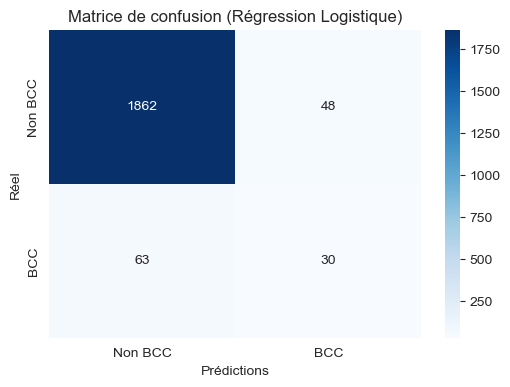

In [10]:

# Entraînement
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

# Prédictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print(f"Exactitude (Accuracy) : {accuracy_logreg:.2f}")
print(f"Score ROC-AUC : {roc_auc_logreg:.2f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])
plt.title("Matrice de confusion (Régression Logistique)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/28L avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/28L'):
    os.makedirs('reports/images/entrainement/28L')
plt.savefig('reports/images/entrainement/28L/mat_conf_logreg_28L.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/28L
filename = 'models/model_logreg_28L.pkl'
pickle.dump(logreg, open(filename, 'wb'))




### On remarque que la regression logistique a une accuracy de 0.94 et un score roc-auc de 0.84 cependant on peut essayer d'autres algorithmes pour voir si on peut avoir de meilleurs resultats , car pour la regression logistique le nombre de faux negatifs est assez eleve , MAIS PLUS DE VRAIS POSITIFS

### Modèle Random Forest sur 28L

Exactitude (Accuracy) : 0.95
Score ROC-AUC : 0.89


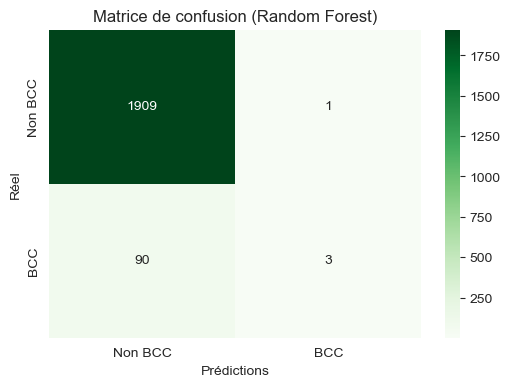

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Exactitude (Accuracy) : {accuracy_rf:.2f}")
print(f"Score ROC-AUC : {roc_auc_rf:.2f}")

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])

plt.title("Matrice de confusion (Random Forest)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/28L avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/28L'):
    os.makedirs('reports/images/entrainement/28L')
plt.savefig('reports/images/entrainement/28L/mat_conf_rf_28L.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/28L
filename = 'models/model_rf_28L.pkl'
pickle.dump(rf, open(filename, 'wb'))




### Le modele Random Forest a ENORMEMENT DE FAUX NEGATIFS , mais il a moins de faux positifs que la regression logistique

### Arbres de Décision sur 28L

Exactitude (Accuracy) : 0.92
Score ROC-AUC : 0.63


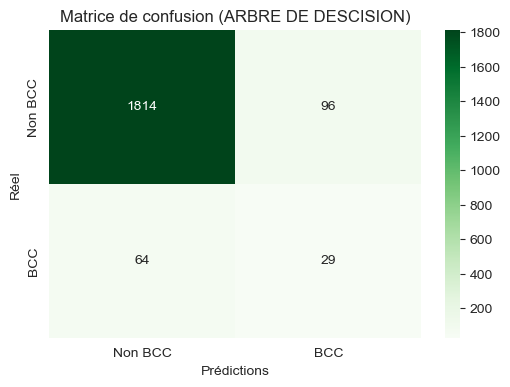

In [13]:
# Entraînement
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Prédictions
y_pred_dt = dt.predict(X_test_scaled)
y_pred_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Calcul des métriques
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

print(f"Exactitude (Accuracy) : {accuracy_dt:.2f}")
print(f"Score ROC-AUC : {roc_auc_dt:.2f}")

# Matrice de confusion
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=['Non BCC', 'BCC'], yticklabels=['Non BCC', 'BCC'])

plt.title("Matrice de confusion (ARBRE DE DESCISION)")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
# sauvegarde de l'image de la matrice de confusion dans le dossier reports/images/entrainement/28L avec creation du dossier si il n'existe pas
# create the folder if it doesn't exist
import os
if not os.path.exists('reports/images/entrainement/28L'):
    os.makedirs('reports/images/entrainement/28L')
plt.savefig('reports/images/entrainement/28L/mat_conf_dt_28L.png')
plt.show()
# sauvegarde du modele au format pkl dans le dossier models/28L
filename = 'models/model_dt_28L.pkl'
pickle.dump(rf, open(filename, 'wb'))




### Le modele d'arbre de decision identifie plus de cas BCC que les autres et mais moins de faux negatifs , il sera sans doute meilleur avec un jeu de donnees plus detaille 

# RECAPITULATIF DES MODELES SUR LE DATASET 28L : IMAGES 8x8 EN RGB on constate une legere amelioration du modele

----
# ON CONSTATE UN MEILLEUR RESULTAT QU'AVEC UN ENTRAINEMENT SUR 8L MAIS PAS FORCEMENT MEILLEUR QUE CELUI DE RGB , LA COULUER SEMBLE AVOIR UN IMPACT SUR LA PERFORMANCE DU MODELE 

## ENTRAINEMENT SUIVANT AVEC LE DATASET 28RGB : IMAGES 28x28 EN RGB
